Pre-procesamiento Fuga Clientes

---

El caso a abordar consiste en la problemática de una entidad financiera al presentar altas tasas de fuga voluntaria. La institución no tiene claro cuál es el perfil característico que tienen los clientes fugitivos, ni las razones por las cuales éstos se fugan.


Para ello, se seguirá la siguiente metodología de preprocesamiento:

1. **Análisis Exploratorio de Datos (AED)**: primera etapa, y que tiene por finalidad: *identificar problemas* en la base de datos, y *detectar patrones y tendencias en ellos.* Se logrará esto mediante el análisis descriptivo, calculando las principales métricas estadísticas, y a través de las técnicas de análisis univariado y bivariado, con el apoyo de gráficos.

2. **Limpieza de datos:** corregir los valores perdidos e inconsistencias (VP/I) detectados en el paso anterior.

3. **Transformar datos y generar indicadores:** Transformar las variables disponibles de forma de encontrar nuevas variables, generadas a partir de las originales, que puedan tener un buen desempeño predictivo.

4. **Selección y Ranking de Atributos:** Analizar variables de la base. Elaborar un ranking de relevancia de las variables. Plantear conclusiones en base a este análisis.

Las variables recolectadas en la base por cada cliente, consisten en:

1.	FUGA: F=cliente fugado, NF= cliente activo (variable objetivo, última columna)
2.	CreditMes_T: Crédito en mes T
3.	CreditMes_T-1: Crédito en mes T-1
4.	CreditMes_T-2: Crédito en mes T-2
5.	NumTarjCred_T: Número de tarjetas de crédito en mes T
6.	NumTarjCred_T-1: Número de tarjetas de crédito en mes T-1
7.	NumTarjCred_T-2: Número de tarjetas de crédito en mes T-2
8.	Ingreso: Ingreso cliente
9.	Edad: Edad cliente
10.	NumTransWeb_T: Número de transacciones en web en mes T
11.	NumTransWeb_T-1: Número de transacciones en web en mes T-1
12.	NumTransWeb_T-2: Número de transacciones en web en mes T-2
13.	MargenComp_T: Margen del cliente para la compañía en mes T
14.	MargenComp_T-1: Mmargen del cliente para la compañía en mes T-1
15.	MargenComp_T-2: Margen del cliente para la compañía en mes T-2
16.	MargenComp_T-3: Margen del cliente para la compañía en mes T-3
17.	MargenComp_T-4: Margen del cliente para la compañía en mes T-4
18.	MargenComp_T-5: Margen del cliente para la compañía en mes T-5
19.	MargenComp_T-6: Margen del cliente para la compañía en mes T-6
20.	Telefono: La compañia posee el numero de telefono del cliente
21.	NivelEduc: Nivel Educacional del cliente
22.	Genero: Genero del cliente
23.	EstCivil: Estado civil del cliente
24.	Region: Region donde vive el cliente



---




## 1. Análisis Exploratorio de Datos

Instalación e importación de las librerías con las que vamos a trabajar

In [ ]:
!pip -q install numpy gensim scikit-learn

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sn
from pandas.api.types import is_numeric_dtype
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import SelectKBest, f_classif
np.set_printoptions(suppress=True)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Se guarda la ruta del archivo en una variable, y se lee con la librería pandas

In [ ]:
ruta_data_set = 'gdrive/My Drive/Colab Notebooks/Base_Fuga_DABI_M1.xlsx'
data_set = pd.read_excel(ruta_data_set)

Revisamos las diferentes columnas, su cantidad de valores non-null y el tipo de dato que almacenan

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditMes_T      5603 non-null   float64
 1   CreditMes_T-1    5605 non-null   int64  
 2   CreditMes_T-2    5605 non-null   int64  
 3   NumTarjCred_T    5598 non-null   float64
 4   NumTarjCred_T-1  5603 non-null   float64
 5   NumTarjCred_T-2  5605 non-null   int64  
 6   Ingreso          5605 non-null   int64  
 7   Edad             5605 non-null   int64  
 8   NumTransWeb_T    5603 non-null   float64
 9   NumTransWeb_T-1  5603 non-null   float64
 10  NumTransWeb_T-2  5605 non-null   int64  
 11  MargenComp_T     5603 non-null   float64
 12  MargenComp_T-1   5604 non-null   float64
 13  MargenComp_T-2   5605 non-null   int64  
 14  MargenComp_T-3   5605 non-null   int64  
 15  MargenComp_T-4   5603 non-null   float64
 16  MargenComp_T-5   5604 non-null   float64
 17  MargenComp_T-6

De las 24 variables, las 18 primeras son de tipo númerica y las 6 últimas de tipo categórica.

### Análisis Descriptivo

Aplicamos el método describe() para un análisis descriptivo de cada una de las variables, y que nos permitirá detectar posibles inconsistencias y valores perdidos

In [ ]:
data_set.describe(include='all').round(1)

,CreditMes_T,CreditMes_T-1,CreditMes_T-2,NumTarjCred_T,NumTarjCred_T-1,NumTarjCred_T-2,Ingreso,Edad,NumTransWeb_T,NumTransWeb_T-1,...,MargenComp_T-3,MargenComp_T-4,MargenComp_T-5,MargenComp_T-6,Telefono,NivelEduc,Genero,EstCivil,Region,FUGA
count,5603.0,5605.0,5605.0,5598.0,5603.0,5605.0,5605.0,5605.0,5603.0,5603.0,...,5605.0,5603.0,5604.0,5605.0,5605,5602,5605,5603,5605,5605
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,4,3,4,1,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,SI,UNI,M,CAS,RM,NF
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5605,3627,3895,2960,5605,4889
mean,1021484.8,632812.1,583796.3,0.8,0.8,0.8,1223802.4,35.9,5.2,3.9,...,253053.6,253046.6,260956.4,195991.5,NaN,NaN,NaN,NaN,NaN,NaN
std,115216.5,127733.6,80016.5,0.7,0.7,0.7,562272.8,9.2,11.3,8.5,...,2472.4,2546.6,1653.4,3001.6,NaN,NaN,NaN,NaN,NaN,NaN
min,912650.0,500000.0,500000.0,0.0,0.0,0.0,-975950.0,15.0,0.0,0.0,...,100000.0,157840.0,183560.0,137500.0,NaN,NaN,NaN,NaN,NaN,NaN
25%,990500.0,597200.0,562100.0,0.0,0.0,0.0,890450.0,29.0,0.0,0.0,...,252840.0,252960.0,260800.0,195380.0,NaN,NaN,NaN,NaN,NaN,NaN
50%,997700.0,604850.0,566150.0,1.0,1.0,1.0,1057650.0,33.0,0.0,1.0,...,252960.0,253040.0,260880.0,195640.0,NaN,NaN,NaN,NaN,NaN,NaN
75%,1014800.0,623300.0,577400.0,1.0,1.0,1.0,1362600.0,41.0,6.0,5.0,...,253260.0,253320.0,261100.0,196420.0,NaN,NaN,NaN,NaN,NaN,NaN


Se pueden identificar a simple vista variables con datos faltantes, como CreditMes_T, NumTarjCred_T, NumTarjCred_T-1, NumTransWeb_T, NumTransWeb_T-1, MargenComp_T-4, MargenComp_T-5, NivelEduc, EstCivil. Además, variables como Ingreso y Edad muestran inconsistencias: Ingreso tiene valores negativos mínimos y Edad tiene un valor máximo de 131, lo cual es poco probable. Será necesario revisar más detenidamente si existen más valores inconsistentes en el conjunto de datos. Asimismo, se observa que las variables Teléfono y Región tienen un único valor nominal cada una, mientras que la variable Género cuenta con tres categorías únicas. Un análisis univariado y bivariado detallado nos proporcionará una comprensión más precisa de estas variables.

Se imprime el data_set para una visualización de las primeras y últimas filas de cada campo

In [ ]:
print(data_set)

      CreditMes_T  CreditMes_T-1  CreditMes_T-2  NumTarjCred_T  \
0       1031900.0         666500         608000            2.0   
1       1078700.0         634100         583250            0.0   
2       1076000.0         708800         621950            1.0   
3        995450.0         599900         564350            1.0   
4       1052150.0         609800         572450            1.0   
...           ...            ...            ...            ...   
5600     989600.0         596300         561650            0.0   
5601     990050.0         597200         562100            1.0   
5602     990050.0         596750         562100            0.0   
5603     990500.0         596750         562100            0.0   
5604     990500.0         597200         562100            2.0   

      NumTarjCred_T-1  NumTarjCred_T-2  Ingreso  Edad  NumTransWeb_T  \
0                 2.0                2  1050050    30            1.0   
1                 0.0                0   830600    38          

A continuación cuantificamos cuántos valores perdidos tienen las variables

In [ ]:
data_set.isnull().sum()

CreditMes_T        2
CreditMes_T-1      0
CreditMes_T-2      0
NumTarjCred_T      7
NumTarjCred_T-1    2
NumTarjCred_T-2    0
Ingreso            0
Edad               0
NumTransWeb_T      2
NumTransWeb_T-1    2
NumTransWeb_T-2    0
MargenComp_T       2
MargenComp_T-1     1
MargenComp_T-2     0
MargenComp_T-3     0
MargenComp_T-4     2
MargenComp_T-5     1
MargenComp_T-6     0
Telefono           0
NivelEduc          3
Genero             0
EstCivil           2
Region             0
FUGA               0
dtype: int64

#### Análisis Univariado

Los gráficos nos permiten identificar patrones univariados y bivariados, visualizar los datos y valores atípicos. A continuación se realizan los univariados, para posteriormente analizar los bivariados

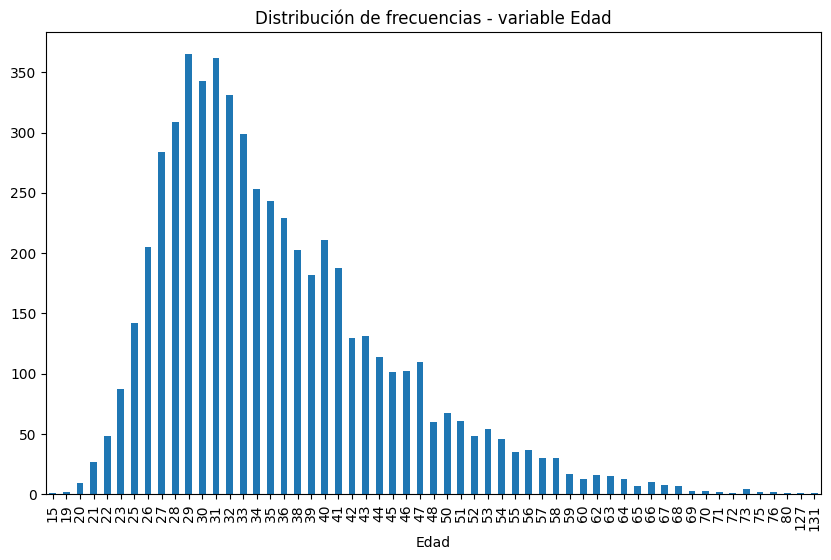

In [ ]:
data_set['Edad'].value_counts().sort_index().plot.bar(figsize=(10,6))
plt.xlabel('Edad')
plt.title('Distribución de frecuencias - variable Edad')
plt.show()

Se realiza un gráfico de frecuencias para identificar los valores atípicos e inconsistencia en la variable Edad. Se detectan 2 valores inconsistentes en el extremo derecho, como son la edad de 127 y 131. Más adelante se procederá a su reemplazo.

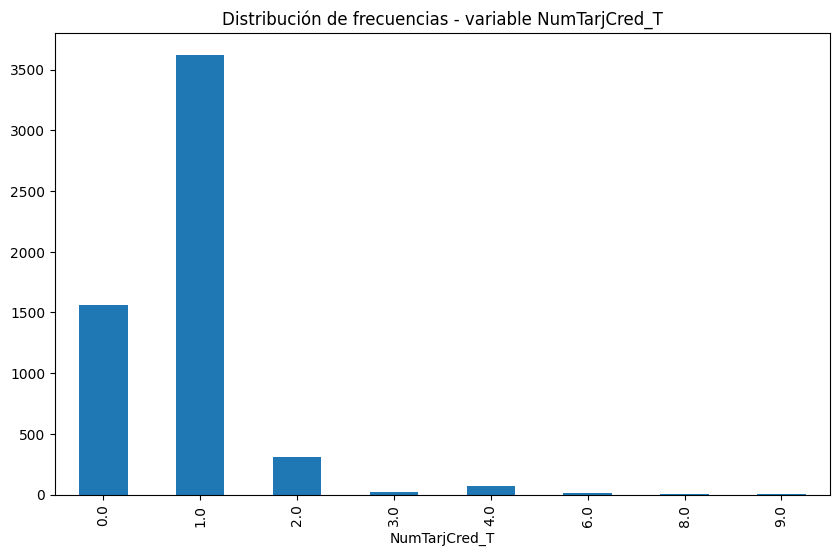

In [ ]:
data_set['NumTarjCred_T'].value_counts().sort_index().plot.bar(figsize=(10,6))
plt.xlabel('NumTarjCred_T')
plt.title('Distribución de frecuencias - variable NumTarjCred_T')
plt.show()

Las variables NumTarjCred_T, pese a tener diferentes valores de cantidad, la distribución de frecuencias nos permite identificar que las cantidades más frecuentes se suelen concentrar entre 1 y 0. Lo que nos dice que los clientes suelen poseer pocas tarjetas de crédito

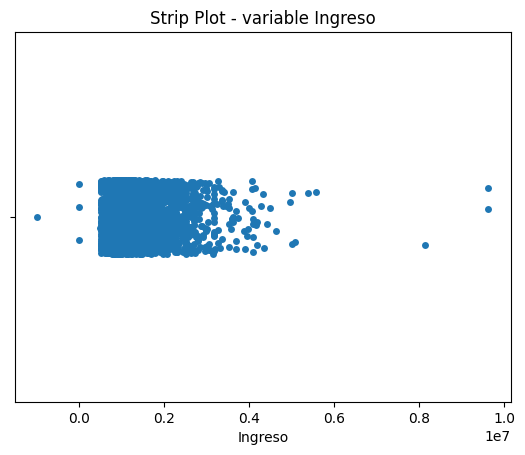

In [ ]:
sn.stripplot(x='Ingreso', data=data_set)
plt.title('Strip Plot - variable Ingreso')
plt.show()

En el Strip Plot observamos que la variable Ingreso tiene sólo una inconsistencia negativa, tres valores iguales a 0, y tres valores atípicos en el extremo derecho (ingresos muy altos). La mayoría, sin embargo, está concentrada en un rango en particular.

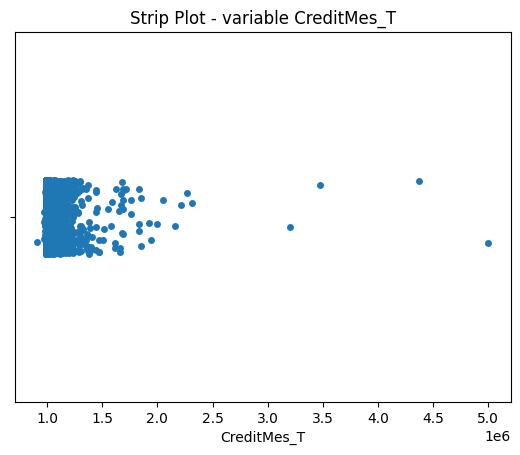

In [ ]:
sn.stripplot(x='CreditMes_T', data=data_set)
plt.title('Strip Plot - variable CreditMes_T')
plt.show()

La variable CreditMes_T nos muestra una mayor concentración en los valores menores al millón y medio, lo que indica que los créditos que se solicitan con mayor frecuencia rondan esos rangos, y a partir de ahí crece la dispersión hasta mostrar 4 valores (créditos) atípicos que están muy distantes respecto a los valores concentrados. Estos outliers afectarán las medidas de localización y variabilidad de la variable, pero no son inconsistencias, dado que sigue siendo probable la existencia de clientes que, dadas otras características como por ejemplo el ingreso, puedan presentar altas capacidades de crédito.

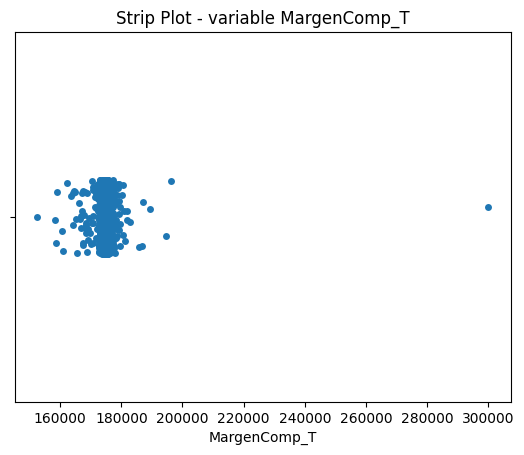

In [ ]:
sn.stripplot(x='MargenComp_T', data=data_set)
plt.title('Strip Plot - variable MargenComp_T')
plt.show()

La variable MargenComp_T sugiere que los márgenes de la empresa por los créditos entregados se concentra en los valores cercanos a 180.000 (¿corresponden éstos, a su cliente objetivo?), mostrando una dispersión hacia valores menores y mayores. Existe un valor atípico en el extremo derecho que ronda los 300.000.

#### Análisis Bivariado

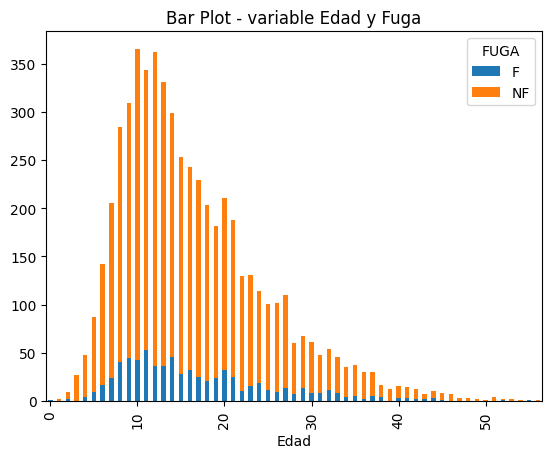

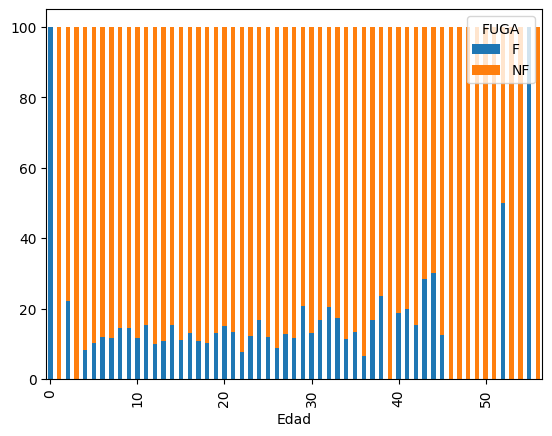

In [ ]:
data_set.groupby(['Edad', 'FUGA']).size().unstack().plot.bar(stacked=True)
plt.xscale('linear')
plt.title('Bar Plot - variable Edad y Fuga')
plt.show()

data_set.groupby(['Edad', 'FUGA']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.xscale('linear')
plt.show()

Los gráficos indican que el riesgo de fuga parece concentrarse en clientes menores de 45 años, con una probabilidad ligeramente mayor, aunque no tan clara, en el rango de 30 a 45 años. Sin embargo, es crucial abordar esta observación con cautela, ya que la mayoría de los registros corresponden a clientes menores de 45 años, y a medida que la edad avanza, hay menos datos disponibles en la base. Esto podría apuntar a un sesgo de selección, donde la menor cantidad de fugas en personas de mayor edad puede deberse a que se rechazan más como potenciales clientes.

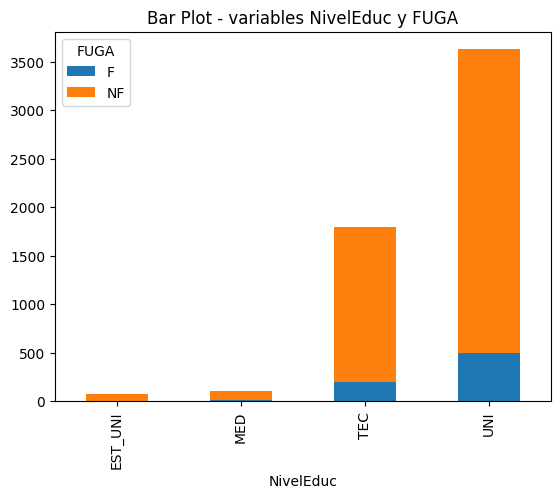

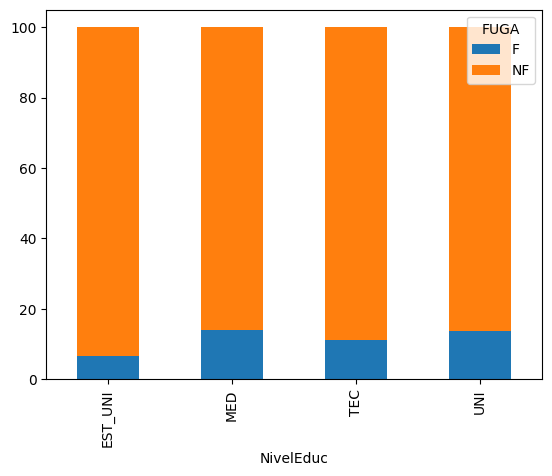

In [ ]:
data_set.groupby(['NivelEduc', 'FUGA']).size().unstack().plot.bar(stacked=True)
plt.title('Bar Plot - variables NivelEduc y FUGA')
plt.show()

data_set.groupby(['NivelEduc', 'FUGA']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()

Respecto a la variable nivel educacional, se presenta un patrón poco claro. Si miramos la proporciones de clientes fugados versus los no fugados, los de educación universitaria como los de educación media se observan igualados, mientras que los educación técnica se encuentran levemente por debajo. Existe, por otro lado, una categoría de estudiante universitario de la que no se tiene claridad de la diferencia en definición respecto a la universitaria, por lo que consideramos podrían conformar una sola categoría.

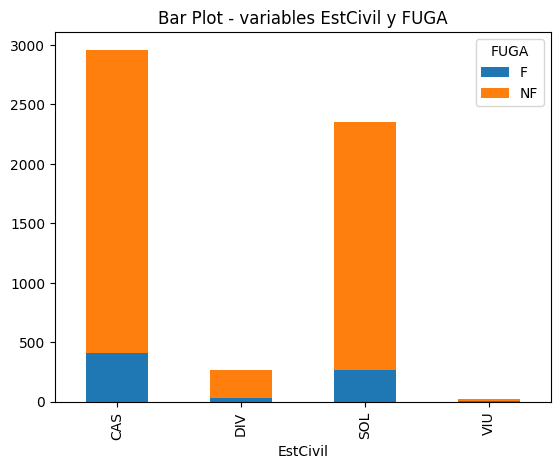

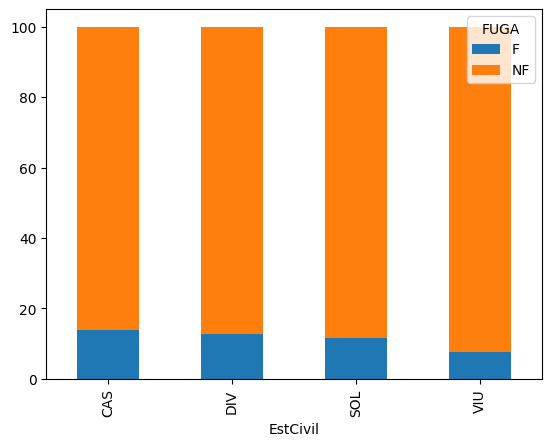

In [ ]:
data_set.groupby(['EstCivil', 'FUGA']).size().unstack().plot.bar(stacked=True)
plt.title('Bar Plot - variables EstCivil y FUGA')
plt.show()

data_set.groupby(['EstCivil', 'FUGA']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()

De acuerdo al barplot del estado civil el patrón analizado no es lo suficiente claro, si bien se puede apreciar un leve mayor riesgo de fuga en aquellos clientes casados, seguidos por los divorciados, solteros y finalmente, los viudos. Por ultimo, no se observa una relación clara entre la variable "Estado Civil" y nuestra variable objetivo.

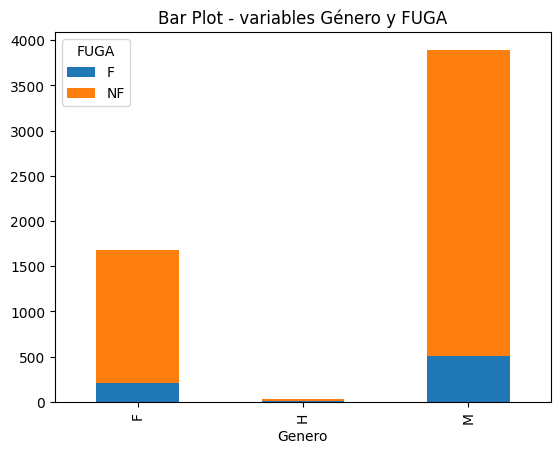

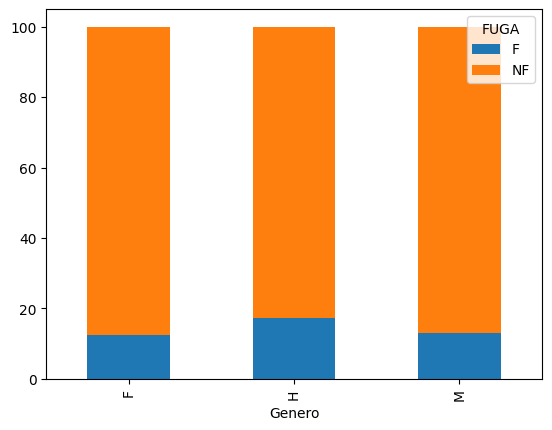

In [ ]:
data_set.groupby(['Genero', 'FUGA']).size().unstack().plot.bar(stacked=True)
plt.title('Bar Plot - variables Género y FUGA')
plt.show()

data_set.groupby(['Genero', 'FUGA']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()

A primera vista, se detecta que existe un tercer valor llamado "H" que seguramente signifique "Hombre" y que debe agruparse con "M" de "Masculino". Será una de las variables a modificar en la etapa de Transformación. En cuanto a si es una variable relevante, a primera vista no se observa un patrón con claridad.

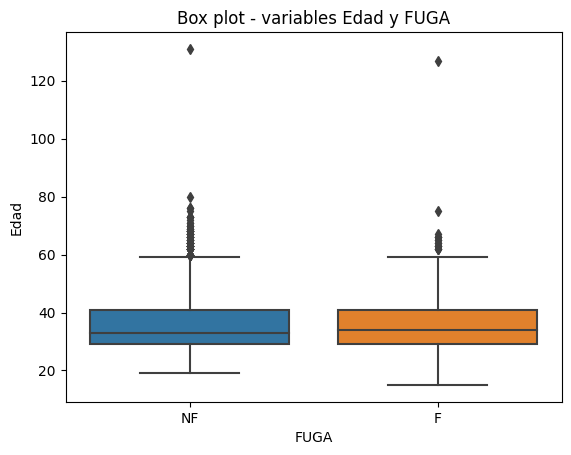

In [ ]:
sn.boxplot(x="FUGA", y="Edad", data=data_set)
plt.title('Box plot - variables Edad y FUGA')
plt.show()

El boxplot entre las variables FUGA y Edad, muestra cajas similares, e indica que la concentración de edades entre los clientes que se fugan y los que no, rondan en el mismo rango entre 30 y 40 aproximadamente, con una mediana de edad entre los que se fugan situada un poco más arriba que aquellos que no, aún sin ser una diferencia lo suficientemente notoria.

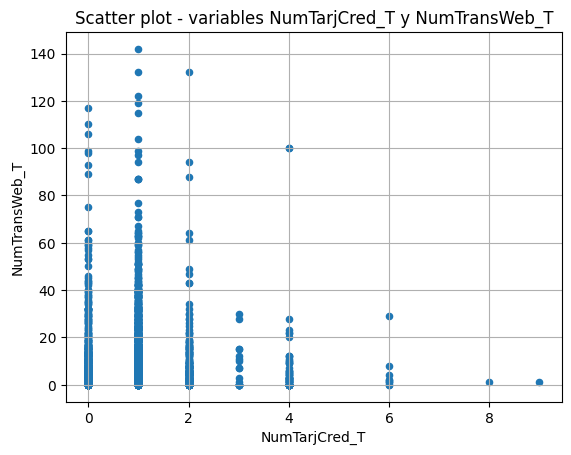

In [ ]:
data_set.plot(kind='scatter', x='NumTarjCred_T', y='NumTransWeb_T', grid=True)
plt.title('Scatter plot - variables NumTarjCred_T y NumTransWeb_T')
plt.show()

El análisis bivariado entre NumTransWeb_T y NumTrajCred_T sugiere que a menor número de tárjetas de crédito mayor es el número de transacciones. Este resultado puede parecer a simple vista contraintuitivo, ya que se podría pensar que a mayor numero de tarjetas de credito, mayores son las transacciones. Pensamos que no necesariamente. Por un lado, las personas pueden tener varias tarjetas pero hacer un uso limitado de ellas, mientras que otras pueden tener una sola tarjeta y usarla con frecuencia para realizar multiples transacciones. De hecho, en uno de los gráficos anteriores identificamos que la mayoría de los clientes dispone de pocas tarjetas de crédito, por lo que es pausible que el consumo se genere sólo en unas cuantas.

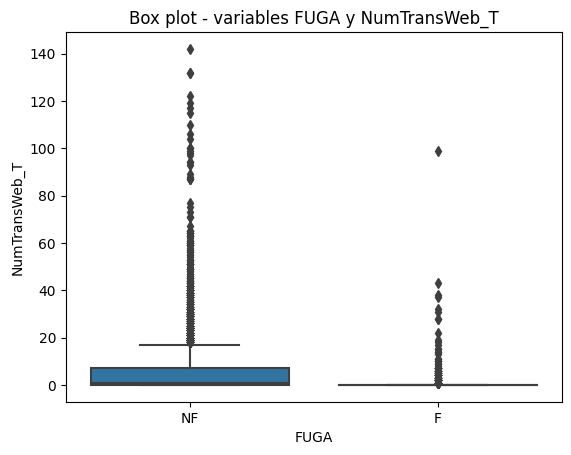

In [ ]:
sn.boxplot(x="FUGA", y="NumTransWeb_T", data=data_set)
plt.title('Box plot - variables FUGA y NumTransWeb_T')
plt.show()

Mirando la relación entre el número de transacciones web y los clientes que se fugan, se aprecia que éstos últimos suelen realizar menos operaciones de consumo vía tarjeta (al menos, online) que los que no se fugan. Por lo que NumTransWeb sí puede ser una variable relevante que de luces de las características de quienes se fugan.

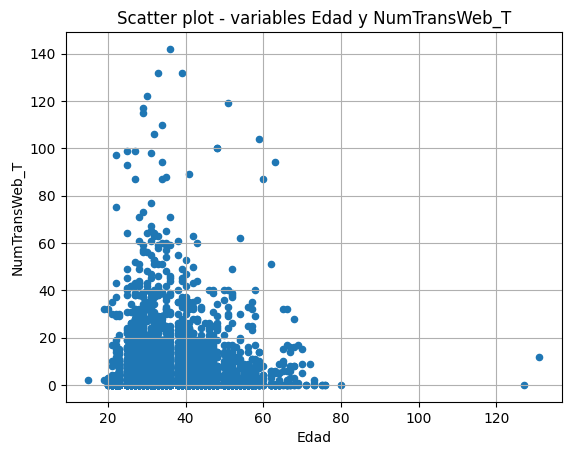

In [ ]:
data_set.plot(kind='scatter', x='Edad', y='NumTransWeb_T', grid=True)
plt.title('Scatter plot - variables Edad y NumTransWeb_T')
plt.show()

En el gráfico podemos visualizar que los mayores niveles de transacciones web son realizados por los rangos etarios entre 20-40 años, seguidos de aquellos entre 40-60 años, y con un nivel mucho menor de transacciones aquellos entre 60-80 años. Otra observación es que la dispersión en el número de transacciones también es mayor en los rangos etarios menores.

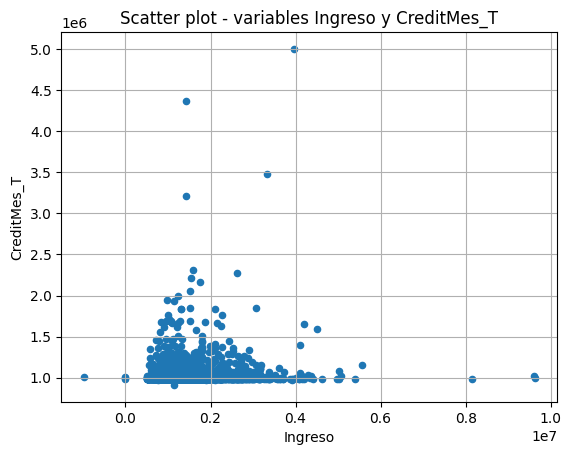

In [ ]:
data_set.plot(kind='scatter', x='Ingreso', y='CreditMes_T', grid=True)
plt.title('Scatter plot - variables Ingreso y CreditMes_T')
plt.show()

Las variables Ingreso y CreditMes-T se relacionan de lo acuerdo a lo esperado: las personas con menores ingresos son las que solicitan mayor crédito. Y es una relación importante a considerar, pues la relación entre ingreso y crédito podría ser una característica que explicase el perfil de los clientes que se fugan. Está relación será contemplada en la etapa de transformación, en la creación de variables.

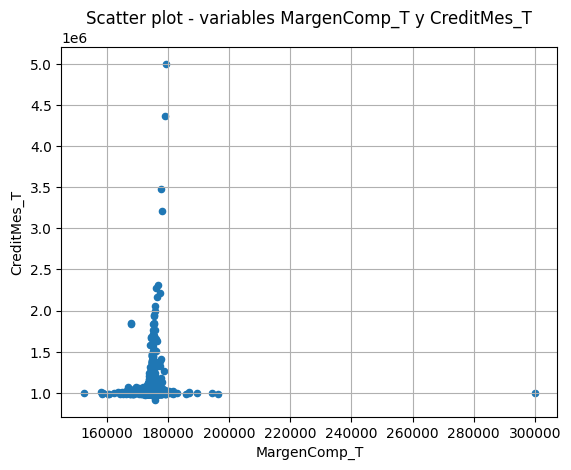

In [ ]:
data_set.plot(kind='scatter', x='MargenComp_T', y='CreditMes_T', grid=True)
plt.title('Scatter plot - variables MargenComp_T y CreditMes_T')
plt.show()

De acuerdo al gráfico que relaciona las variables MargenComp_T y CreditMes_T, las personas que le generan a la institución financiera un margen mensual por persona que ronda aproximadamente los 180.000 son las que solicitan mayores montos de crédito.

## 2. Limpieza de datos

La limpieza de datos consiste en corregir las incongruencias encontradas en el análisis exploratorio de datos, así como los valores perdidos, para poder trabajar la base de datos sin que éstos alteren los resultados.

### Inconsistencias

En la variable Edad, es muy improbable que se presenten valores mayores a 100, razón por la cual aquellos que lo sean se les considere como inconsistencias. Lo mismo ocurre en la variable Ingreso cuando presenta valores negativos. En este paso, por tanto, lo primero es convertir estas inconsistencias en valores nulos, para posteriormente aplicar un método de reemplazo.

In [ ]:
data_set.loc[data_set['Ingreso'] < 1, ['Ingreso']] = np.nan
data_set.loc[data_set['Edad'] > 100, ['Edad']] = np.nan

### Imputar valores perdidos

**Alternativa a utilizar: Remplazo por mediana / moda**

Esta alternativa es recomendable a utilizar cuando los valores perdidos son menores al 5% del total de los datos. El primero paso es, entonces, examinar el % de valores perdidos para las variables que los presenten.

In [ ]:
val_per = pd.DataFrame(data_set.isnull().sum(), columns=['Val_perdidos'])
val_per['% val_perdidos'] = 100 * val_per['Val_perdidos'] / len(data_set)
val_per[val_per['% val_perdidos'] > 0]

,Val_perdidos,% val_perdidos
CreditMes_T,2,0.035682
NumTarjCred_T,7,0.124888
NumTarjCred_T-1,2,0.035682
Ingreso,4,0.071365
Edad,2,0.035682
NumTransWeb_T,2,0.035682
NumTransWeb_T-1,2,0.035682
MargenComp_T,2,0.035682
MargenComp_T-1,1,0.017841
MargenComp_T-4,2,0.035682


Tenemos que el % de valores perdidos existentes son bastante bajos (el más alto corresponde al 0.1%).

A continuación, identificaremos que tipo de VP/I tienen estas variables. Si son
Missing Completely At Random (MCAR), se eligirá el método de reemplazo por las medidas de tendencia central, aplicando una u otra según si la variable es númerica o categórica. Si por el contrario, son Not Missing At Random (NMAR), se utilizara el reemplazo Ad-hoc.

In [ ]:
# VP/I menores al 5%, siendo también MCAR: reemplazo por la mediana al ser variables numéricas, y por presentar grados altos de dispersión
# (la mediana es más robusta que la media respecto a la dispersión de los datos)
data_set['CreditMes_T'].fillna(data_set['CreditMes_T'].median(skipna =True), inplace=True)
data_set['NumTarjCred_T'].fillna(data_set['NumTarjCred_T'].median(skipna =True), inplace=True)
data_set['NumTarjCred_T-1'].fillna(data_set['NumTarjCred_T-1'].median(skipna =True), inplace=True)
data_set['NumTransWeb_T'].fillna(data_set['NumTransWeb_T'].median(skipna =True), inplace=True)
data_set['NumTransWeb_T-1'].fillna(data_set['NumTransWeb_T-1'].median(skipna =True), inplace=True)
data_set['MargenComp_T'].fillna(data_set['MargenComp_T'].median(skipna =True), inplace=True)
data_set['MargenComp_T-1'].fillna(data_set['MargenComp_T-1'].median(skipna =True), inplace=True)
data_set['MargenComp_T-4'].fillna(data_set['MargenComp_T-4'].median(skipna =True), inplace=True)
data_set['MargenComp_T-5'].fillna(data_set['MargenComp_T-5'].median(skipna =True), inplace=True)
data_set['Ingreso'].fillna(data_set['Ingreso'].median(skipna =True), inplace=True)

# VP/I menores al 5%, siendo también MCAR: reemplazo por la moda al ser variables categóricas.
mode1 = data_set['NivelEduc'].mode()
data_set['NivelEduc'].fillna(mode1[0], inplace=True)

mode2 = data_set['EstCivil'].mode()
data_set['EstCivil'].fillna(mode2[0], inplace=True)

Los VP/I de la variable Edad identificados anteriormente, se cambiaran por un tipo de reemplazo Ad-hoc, al ser reconocidos como valores Not Missing At Random, pues si bien no conocemos la edad exacta, podemos estar seguro de que son edades altas, y aproximarlas a un valor como es el de 100.

In [ ]:
# VP/I menores al 5%, siendo también NMAR: reemplazo ad-hoc.
data_set['Edad'].fillna(100, inplace=True)

Corroboramos que no existan valores perdidos en la base de datos:

In [ ]:
data_set.isnull().sum()

CreditMes_T        0
CreditMes_T-1      0
CreditMes_T-2      0
NumTarjCred_T      0
NumTarjCred_T-1    0
NumTarjCred_T-2    0
Ingreso            0
Edad               0
NumTransWeb_T      0
NumTransWeb_T-1    0
NumTransWeb_T-2    0
MargenComp_T       0
MargenComp_T-1     0
MargenComp_T-2     0
MargenComp_T-3     0
MargenComp_T-4     0
MargenComp_T-5     0
MargenComp_T-6     0
Telefono           0
NivelEduc          0
Genero             0
EstCivil           0
Region             0
FUGA               0
dtype: int64

## 3. Transformación

La transformación de datos tiene tres objetivos principales: mejorar la capacidad predictiva de una variable, dar sentido matemático a las variables, e igualar pesos relativos. La aplicación de ésta última dependerá de las características de la variable objetivo y del modelo a utilizar en fases posteriores al preprocesamiento.

### Mejorar la capacidad predictiva: Agregación

##### *Agregación variables categóricas*

Si una variable es categórica, podemos agrupar alternativas. Para "NivelEduc", por ejemplo, podemos construir "EST_UNI" + "UNI" = "UNI".

Para "Genero", podemos consolidar "H" + "M" = "M". Esto permite reducir la cantidad de variables binarias cuando le damos sentido matemático.

In [ ]:
data_set['Genero'] = data_set['Genero'].replace('H', 'M')
data_set['NivelEduc'] = data_set['NivelEduc'].replace('EST_UNI', 'UNI')

##### *Agregación variables numéricas (ratios y sumas)*

A continuación se crean nuevas variables a partir de las relaciones entre existentes, que consideramos contribuirán positivamente al análisis

In [ ]:
data_set['Credito_Total'] = data_set['CreditMes_T'] + data_set['CreditMes_T-1'] + data_set['CreditMes_T-2'] # Suma de todos los creditos
data_set['Credito_Ing'] = data_set['Credito_Total']/data_set['Ingreso'] # Ratio credito respecto al ingreso
data_set['NumTarjCred_Total'] = data_set.loc[:, 'NumTarjCred_T':'NumTarjCred_T-2'].max(axis=1) # Max de tarjetas de credito por cliente
data_set['NumTransWeb_Total'] = data_set['NumTransWeb_T'] + data_set['NumTransWeb_T-1'] + data_set['NumTransWeb_T-2'] # Suma de transacciones
data_set['MargenComp_Total'] = data_set['MargenComp_T'] + data_set['MargenComp_T-1'] + data_set['MargenComp_T-2'] # Suma de margenes, se descartan meses de T-3 a T-6

Para la variable 'MargenComp_Total' se descartaron los meses T-3 a T-6 ya que estos periodos no estan presentes en las otras variables y no permiten realizar comparaciones equivalentes.

Se eliminan las variables sobre las cuales fueron construidas las nuevas, y así evitar redundancia que pueda afectar en la creación de modelos posteriores

In [ ]:
del data_set['CreditMes_T']
del data_set['CreditMes_T-1']
del data_set['CreditMes_T-2']

del data_set['NumTarjCred_T']
del data_set['NumTarjCred_T-1']
del data_set['NumTarjCred_T-2']

del data_set['NumTransWeb_T']
del data_set['NumTransWeb_T-1']
del data_set['NumTransWeb_T-2']

del data_set['MargenComp_T']
del data_set['MargenComp_T-1']
del data_set['MargenComp_T-2']
del data_set['MargenComp_T-3']
del data_set['MargenComp_T-4']
del data_set['MargenComp_T-5']
del data_set['MargenComp_T-6']

### Mejorar la capacidad predictiva: Discretización

Aquí creamos una nueva variable llamada "Categoria_Ingreso" y definimos los bins para segmentar la variable Ingreso en "Bajo", "Medio" y "Alto". Si bien no es estrictamente necesario realizar este paso, se dejará expresado y agregado como una variable más en el dataset para posibles conclusiones posteriores.

In [ ]:
# Discretizar variable ingreso
# Definir los bins y etiquetas
bins = [0, 900000, 2000000, float('inf')]  # Rangos para 'Bajo', 'Medio', y 'Alto'
labels = ['Bajo', 'Medio', 'Alto']

# Aplicar la discretización
data_set['Categoria_Ingreso'] = pd.cut(data_set['Ingreso'], bins=bins, labels=labels, include_lowest=True)

# Mostrar el DataFrame resultante
frecuencia_por_categoria = data_set['Ingreso'].value_counts()
print('Frecuencia por Categoría de Ingreso:')
print(frecuencia_por_categoria)
print(data_set)

Frecuencia por Categoría de Ingreso:
867650.0     83
959800.0     75
1051950.0    70
1329350.0    70
914200.0     58
             ..
1410100.0     1
1498450.0     1
2325900.0     1
663400.0      1
3693900.0     1
Name: Ingreso, Length: 1442, dtype: int64
        Ingreso  Edad Telefono NivelEduc Genero EstCivil Region FUGA  \
0     1050050.0  30.0       SI       UNI      M      SOL     RM   NF   
1      830600.0  38.0       SI       TEC      F      CAS     RM   NF   
2      980700.0  25.0       SI       UNI      F      SOL     RM   NF   
3     1178300.0  46.0       SI       TEC      M      CAS     RM   NF   
4      868600.0  55.0       SI       MED      F      SOL     RM   NF   
...         ...   ...      ...       ...    ...      ...    ...  ...   
5600   972150.0  26.0       SI       UNI      F      SOL     RM    F   
5601   992100.0  33.0       SI       UNI      M      SOL     RM    F   
5602   851500.0  30.0       SI       TEC      M      CAS     RM    F   
5603  3693900.0  58.0    

De forma complementaria graficamos el resultado para observar como quedan distribuidos los datos al discretizar la variable "Ingreso".

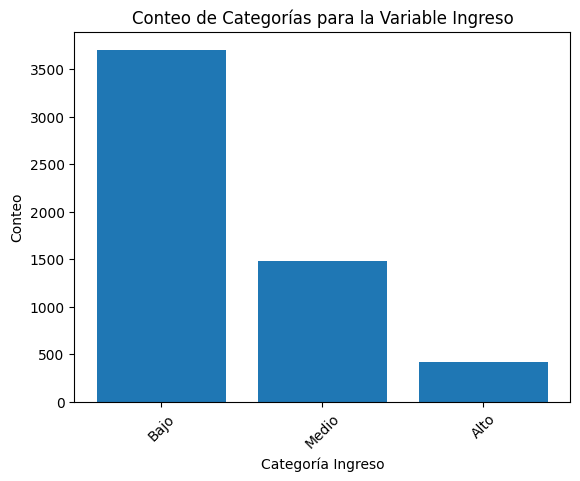

In [ ]:
# Contar la frecuencia de cada categoría de ingreso
conteo_categorias = data_set['Categoria_Ingreso'].value_counts()

# Graficar el conteo de categorías
plt.bar(['Bajo', 'Medio', 'Alto'], conteo_categorias.values)
plt.xlabel('Categoría Ingreso')
plt.ylabel('Conteo')
plt.title('Conteo de Categorías para la Variable Ingreso')
plt.xticks(rotation=45)  # Rotar las etiquetas para mayor claridad
plt.show()

### Mejorar la capacidad predictiva: Transformación de Box-Cox

Con el gráfico histograma identificamos cómo es la distribución en la variable Ingreso, la variable Credito_Total, y la variable NumTransWeb_Total

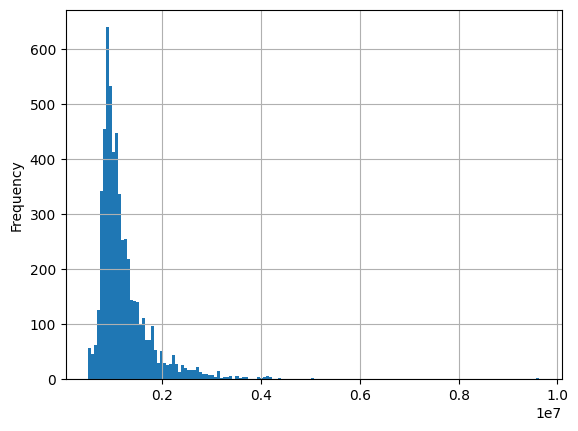

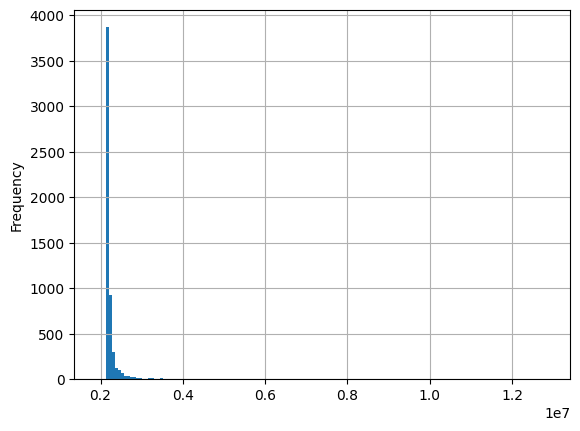

In [ ]:
data_set['Ingreso'].plot(kind='hist',bins=150, grid=True )
plt.show()
data_set['Credito_Total'].plot(kind='hist',bins=150, grid=True )
plt.show()

Dado que son variables con distribución asimétrica, les aplicaremos a cada una la función de logaritmo, y así expandirlas de adentro hacia afuera.

In [ ]:
data_set['Ln_Ingreso'] = np.log(data_set['Ingreso']+1)
data_set['Ln_Credito_Total'] = np.log(data_set['Credito_Total']+1)

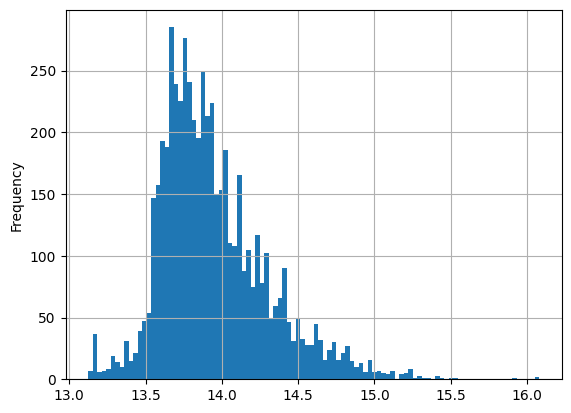

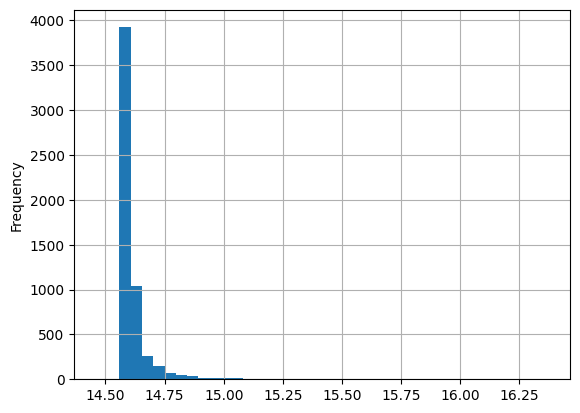

In [ ]:
data_set['Ln_Ingreso'].plot(kind='hist',bins=100, grid=True )
plt.show()
data_set['Ln_Credito_Total'].plot(kind='hist',bins=40, grid=True )
plt.show()

Una vez corregida la asimetría, se eliminan las variables originales.

In [ ]:
del data_set['Ingreso']
del data_set['Credito_Total']

### Dar sentido matemático a variables nominales

In [ ]:
data_set = pd.get_dummies(data_set, columns = ["FUGA"], drop_first = True)
data_set = pd.get_dummies(data_set, columns = ["Genero"], drop_first = True)
data_set = pd.get_dummies(data_set, columns = ["NivelEduc"], drop_first = True)
data_set = pd.get_dummies(data_set, columns = ["EstCivil"], drop_first = True)
data_set = pd.get_dummies(data_set, columns = ["Categoria_Ingreso"], drop_first = True)
data_set = pd.get_dummies(data_set, columns = ["Telefono"])
data_set = pd.get_dummies(data_set, columns = ["Region"])
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Edad                     5605 non-null   float64
 1   Credito_Ing              5605 non-null   float64
 2   NumTarjCred_Total        5605 non-null   float64
 3   NumTransWeb_Total        5605 non-null   float64
 4   MargenComp_Total         5605 non-null   float64
 5   Ln_Ingreso               5605 non-null   float64
 6   Ln_Credito_Total         5605 non-null   float64
 7   FUGA_NF                  5605 non-null   uint8  
 8   Genero_M                 5605 non-null   uint8  
 9   NivelEduc_TEC            5605 non-null   uint8  
 10  NivelEduc_UNI            5605 non-null   uint8  
 11  EstCivil_DIV             5605 non-null   uint8  
 12  EstCivil_SOL             5605 non-null   uint8  
 13  EstCivil_VIU             5605 non-null   uint8  
 14  Categoria_Ingreso_Medio 

## 4. Selección y Ranking de atributos

Los filtros se utilizan para elegir un subconjunto de variables relevantes eliminando las que generan ruido antes de correr los modelos. Veremos tres criterios:

### Inutilidad

Este criterio consiste en descartar las variables muy concentradas dentro de la base de datos. Se entiende como muy concentradas aquellas con una desviación estándar cercana a 0. Para esto calculamos la desviación estándar de las variables:

In [ ]:
data_set.std()

Edad                          9.129028
Credito_Ing                   0.652659
NumTarjCred_Total             0.715643
NumTransWeb_Total            27.664485
MargenComp_Total           3159.263889
Ln_Ingreso                    0.353859
Ln_Credito_Total              0.086666
FUGA_NF                       0.333833
Genero_M                      0.458260
NivelEduc_TEC                 0.466476
NivelEduc_UNI                 0.473406
EstCivil_DIV                  0.212254
EstCivil_SOL                  0.493542
EstCivil_VIU                  0.067956
Categoria_Ingreso_Medio       0.473588
Categoria_Ingreso_Alto        0.264169
Telefono_SI                   0.000000
Region_RM                     0.000000
dtype: float64

Se eliminan las variables con desviación estándar muy cercana a cero

In [ ]:
del data_set['Telefono_SI']
del data_set['Region_RM']

### Redundancia

Este criterio consiste en encontrar las variables que están muy correlacionadas entre sí, dejando solo una, dado que las variables redundantes no aportan información nueva, y pueden afectar a la predicción de los modelos. Se entiende como muy correlacionadas aquellas con valores superiores al 0,9. Lo primero es visualizar la matriz de correlaciones bivariadas mediante un heatmap:

<Axes: >

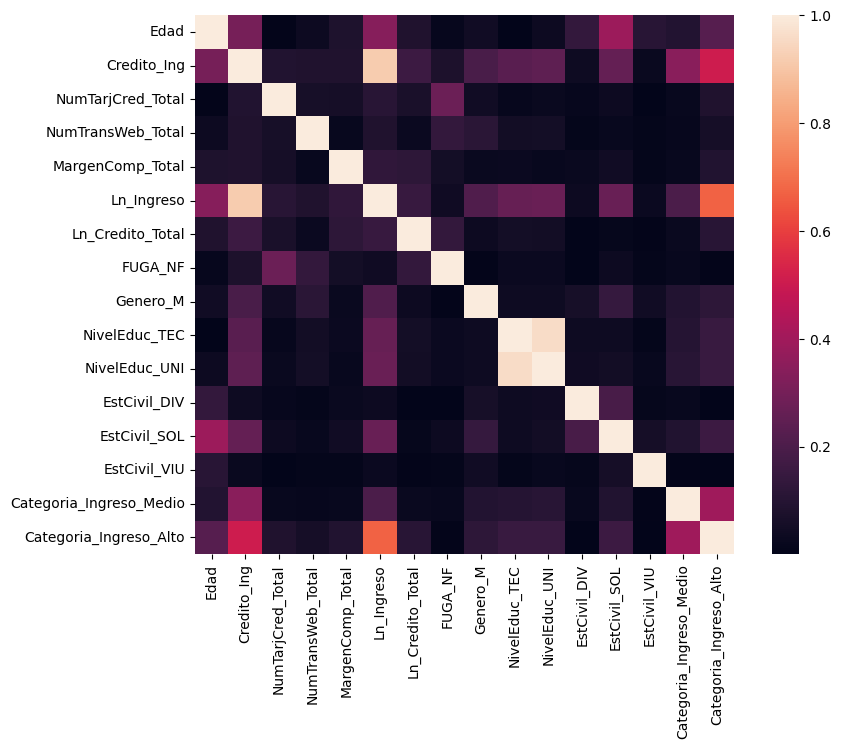

In [ ]:
corrmat = data_set.corr().abs()
f, ax = plt.subplots(figsize=(10, 7))
sn.heatmap(corrmat, square=True)

En la figura anterior vemos que la variable NivelEduc_TEC y NivelEduc_UNI estan altamente correlacionadas (0.957, como se observa en el código de abajo) por lo que tenemos que eliminar una. Podemos analizar la relevancia de ambas para determinar cual elegir.

In [ ]:
corrmat.loc["NivelEduc_UNI"]

Edad                       0.032755
Credito_Ing                0.243414
NumTarjCred_Total          0.025978
NumTransWeb_Total          0.052321
MargenComp_Total           0.021084
Ln_Ingreso                 0.269808
Ln_Credito_Total           0.050775
FUGA_NF                    0.029032
Genero_M                   0.038799
NivelEduc_TEC              0.957703
NivelEduc_UNI              1.000000
EstCivil_DIV               0.042922
EstCivil_SOL               0.050627
EstCivil_VIU               0.023221
Categoria_Ingreso_Medio    0.106585
Categoria_Ingreso_Alto     0.148951
Name: NivelEduc_UNI, dtype: float64

El mapa de calor también revela la alta correlación (0.917) entre las variables Ln_Ingreso y Credito_Ing, por lo que también será revisada la relevancia en ambas, y así descartar una de ellas.

In [ ]:
corrmat.loc["Ln_Ingreso"]

Edad                       0.338623
Credito_Ing                0.917001
NumTarjCred_Total          0.108357
NumTransWeb_Total          0.086009
MargenComp_Total           0.126181
Ln_Ingreso                 1.000000
Ln_Credito_Total           0.146621
FUGA_NF                    0.040063
Genero_M                   0.210221
NivelEduc_TEC              0.262492
NivelEduc_UNI              0.269808
EstCivil_DIV               0.032739
EstCivil_SOL               0.268524
EstCivil_VIU               0.028692
Categoria_Ingreso_Medio    0.199059
Categoria_Ingreso_Alto     0.670369
Name: Ln_Ingreso, dtype: float64

### Relevancia

Finalmente, este criterio consiste en ver que variables de la matriz X están más correlacionadas con la variable objetivo Y. Utilizaremos el test chi cuadrado que calcula la relación entre dos variables nominales.

In [ ]:
tbl = pd.crosstab(index= data_set['NivelEduc_TEC'],columns=data_set['FUGA_NF'])
stat, p, dof, expected = chi2_contingency(tbl)
print('Valor chi cuadrado = %d' % stat)
print('P-valor =%f' % p)
tbl = pd.crosstab(index=data_set['NivelEduc_UNI'], columns=data_set['FUGA_NF'])
stat, p, dof, expected = chi2_contingency(tbl)
print('Valor chi cuadrado = %d' % stat)
print('P-valor =%f' % p)

Valor chi cuadrado = 5
P-valor =0.022779
Valor chi cuadrado = 4
P-valor =0.033070


Ambas tienen relevancia. Sin embargo, NivelEduc_TEC es ligeramente más relevante (Un p-valor menor, y un valor chi cuadrado = 5 versus Valor chi cuadrado = 4), por lo que eliminaremos la variable NivelEduc_UNI.

In [ ]:
del data_set['NivelEduc_UNI']

Calculamos también la relevancia entre las variables Ln_Ingreso y Credito_ing que, al ser numéricas, las tenemos que discretizar antes de aplicar el chi cuadrado.



In [ ]:
cut_points = data_set['Ln_Ingreso'].quantile([0, .2, .4, .6, .8, 1])
Ingreso_binned = pd.cut(data_set['Ln_Ingreso'], bins =cut_points, include_lowest= True )
cut_points = data_set['Credito_Ing'].quantile([0, .2, .4, .6, .8, 1])
Credito_ing_binned = pd.cut(data_set['Credito_Ing'], bins =cut_points, include_lowest= True )

Ahora que tenemos las variables discretizadas "Ingreso_binned" e "Credito_Ing_binned", procedemos a calcular el test chi cuadrado:

In [ ]:
tbl = pd.crosstab(index= Ingreso_binned,columns=data_set['FUGA_NF'])
stat, p, dof, expected = chi2_contingency(tbl)
print('Valor chi cuadrado = %d' % stat)
print('P-valor =%f' % p)
tbl = pd.crosstab(index=Credito_ing_binned, columns=data_set['FUGA_NF'])
stat, p, dof, expected = chi2_contingency(tbl)
print('Valor chi cuadrado = %d' % stat)
print('P-valor =%f' % p)

Valor chi cuadrado = 10
P-valor =0.038044
Valor chi cuadrado = 32
P-valor =0.000001


La variable Credito_Ing es más relevante, al poseer un p-valor menor y un chi cuadrado mayor. Por lo que se procede a eliminar la variable Ln_Ingreso.

In [ ]:
del data_set['Ln_Ingreso']

**Selección de variables más relevantes**

Seleccionaremos las variables más relevantes con el método SelectKbest. Primero definimos como X las variables independientes y como Y la variable dependiente:

In [ ]:
X = data_set.loc[:, data_set.columns != 'FUGA_NF']
y = data_set.loc[:, data_set.columns == 'FUGA_NF']
X.shape #esto nos dice que tenemos 13 variables)

(5605, 13)

Ahora aplicamos la función SelectKBest con el test F de Fisher para determinar las variables más relevantes. Se utiliza esta alternativa, dado que las variables son principalmente numéricas:

In [ ]:
X_new = SelectKBest(k=5).fit(X, y.values.ravel())
#Veamos el test F y p-valor de todas las variables (no importa que diga k=5; es un número arbitrario)
print(X_new.scores_)
print(X_new.pvalues_)
#Vemos que no todas las variables son relevantes para el problema (es decir, que no tienen p-valor<0.05)

[  2.1591002   33.38851608 466.85854774 102.29264906  14.74464856
 106.7968958    0.25084143   5.38572258   0.00077921   6.50895066
   0.6053021    2.33811817   0.3606152 ]
[0.14178381 0.00000001 0.         0.         0.00012445 0.
 0.6165029  0.0203379  0.97773142 0.01075962 0.436595   0.12629843
 0.54818906]


Existen variables que no son relevantes para el problema (tienen p-valor > 0.05), por lo que se procederá a eliminar estas variables.

In [ ]:
# Variables con p-valor >= 0.05
X_new.feature_names_in_[X_new.pvalues_ >= 0.05]

array(['Edad', 'Genero_M', 'EstCivil_DIV', 'EstCivil_VIU',
       'Categoria_Ingreso_Medio', 'Categoria_Ingreso_Alto'], dtype=object)

Las variables como "Edad", "Genero_M", "EstCivil_DIV" y "EstCivil_VIU", "Categoria_Ingreso_Medio", "Categoria_Ingreso_Alto" tienen un p-valor >= 0.05, por lo tanto, no se consideran relevantes y se eliminan del modelo.

In [ ]:
del data_set['Edad']
del data_set['Genero_M']
del data_set['EstCivil_DIV']
del data_set['EstCivil_VIU']
del data_set['Categoria_Ingreso_Medio']
del data_set['Categoria_Ingreso_Alto']

Se elabora el ranking de relevancia de acuerdo a las variables con el menor p-valor.

In [ ]:
np.sort(X_new.pvalues_[X_new.pvalues_<0.05])

array([0.        , 0.        , 0.        , 0.00000001, 0.00012445,
       0.01075962, 0.0203379 ])

En orden ascendente, las variables más relevantes son:

In [ ]:
np.sort(X_new.feature_names_in_[X_new.pvalues_ < 0.05])


array(['Credito_Ing', 'EstCivil_SOL', 'Ln_Credito_Total',
       'MargenComp_Total', 'NivelEduc_TEC', 'NumTarjCred_Total',
       'NumTransWeb_Total'], dtype=object)

### Guardar base de datos preprocesada

Descargamos la base de datos pre-procesada en Google Drive, y con esto el archivo quedará guardado en My Drive (Mi Unidad, si Drive está configurado en español). Guardaremos la base sin escalar ya que la escala original será necesaria después.

In [ ]:
data_set.to_excel('Base_Fuga_DABI_M1_preprocess.xlsx',index=False)
!cp Base_Fuga_DABI_M1_preprocess.xlsx "gdrive/My Drive/Colab Notebooks/"

**Normalización**

El último paso del preprocesamiento será escalar los datos entre 0 y 1 para llevarlos a una escala común. Esto no es necesario para todos los métodos de clasificación, y es por ello que se deja como último paso.

In [ ]:
VarObj = data_set['FUGA_NF']
scaler = MinMaxScaler()
scaler_data = scaler.fit(data_set)
data_set_scaled = pd.DataFrame(scaler_data.transform(data_set), index=data_set.index, columns=data_set.columns)
data_set_scaled['FUGA_NF'] = VarObj
print(data_set_scaled)

      Credito_Ing  NumTarjCred_Total  NumTransWeb_Total  MargenComp_Total  \
0        0.223858           0.222222           0.002445          0.368369   
1        0.288297           0.000000           0.004890          0.369795   
2        0.253095           0.111111           0.000000          0.347690   
3        0.182602           0.111111           0.000000          0.376640   
4        0.266520           0.111111           0.044010          0.375499   
...           ...                ...                ...               ...   
5600     0.225289           0.000000           0.000000          0.370222   
5601     0.220454           0.111111           0.039120          0.381774   
5602     0.260988           0.000000           0.009780          0.370650   
5603     0.040639           0.000000           0.000000          0.488734   
5604     0.256083           0.222222           0.000000          0.370222   

      Ln_Credito_Total  FUGA_NF  NivelEduc_TEC  EstCivil_SOL  
0           

### Conclusiones y discusiones


En el AED se encontraron inconsistencias en variables como Ingreso, Edad, y valores perdidos en CreditMes_T, NumTarjCred_T, NumTarjCred_T-1, NumTransWeb_T, NumTransWeb_T-1, MargenComp_T, MargenComp_T-1, MargenComp_T-4, MargenComp_T-5, NivelEduc y EstCivil, las cuales se les aplico una limpieza y posterior transformación según el tipo de VP/I a que correspondían (MAR, MCAR, NMAR), y en el caso de VP, de acuerdo al porcentaje de valores perdidos con respecto al total (los cuales representaron menos del 5% de los datos), y según si la variable en cuestión era categórica o numérica (lo que determinaría el tipo de medida de tendencia a central a usar).

Los graficos del analisis exploratorio dieron indicios de la poca relevancia de algunas variables que luego el modelo confirmó que era necesario eliminarlas. Tal es el caso de NivelEduc, EstCivil, Genero y Edad, en donde no se observaban patrones claros entre ellos y la variable objetivo.

En la etapa de transformación se realizaron agregaciones en variables como Genero y NivelEduc ya que presentaban categorias que se podian fusionar con otras similares. Ademas, se realizó otro tipo de agregación en las variables Credito_T, Num_TransWeb, Num_TarjCredit y MargenCompl para dejarlas en el mismo periodo comparable. A partir del analisis del AED de las variables CreditMes_T y el Ingreso se constató una relación relevante entre ambas variables, y que consideramos podía ser de interés en la explicación de la variable objetivo, motivo por el cual se decidió crear el ratio Credito_Ing. Esta nueva variable, finalmente, resultó ser aquella con mayor relevancia (menor p-valor) para aplicar posteriormente en un modelo predictivo.

Posteriormente, para mejorar la capacidad predictiva del modelo se decidió discretizar la variable Ingreso en tres categorias: bajo, medio y alto. Sin embargo, en la etapa de seleccion de atributos fue eliminada en la funcion selectkbest por presentar un p-valor mayor al 5%. Además, se realizó la transformación de Box-Cox aplicando logaritmo natural a las variables Ingreso y Credito_Total, esto para normalizar la distribución asimétrica de los datos. Finalmente en la etapa de transformación dimos sentido matematico a las variables nominales.

Luego, se realiza la etapa de selección y ranking de atributos en base a tres criterios: inutilidad, donde a través de la desviación estándar eliminamos aquellas variables muy cercanas a 0 (muy concentradas dentro de la base de datos) como son: Teléfono y Región. En redundancia, se examinó la correlación entre las variables en donde se identificó que NivelEduc_TEC y NivelEduc_UNI presentaban una alta correlación, así como también la correlación entre las variables Ln_Ingreso y Credito_Ing. Para poder determinar cual de estas variables presentaba mayor relevancia se les aplicó un test chi cuadrado a cada par de variables. Ya que chi cuadrado se aplica sobre variables nominales o categóricas, se discretizó el par de variables Ln_Ingreso y Credito_Ing antes de aplicar el test. Los criterios para descartar las variables fueron a través de los estadisticos de p-valor y valor chi cuadrado. Las variables eliminadas fueron: NivelEduc_UNI y Ln_Ingreso por presentar un p-valor mayor y un valor chi cuadrado menor comparado a NivelEduc_TEC y Credito_Ing respectivamente.

Finalmente, se seleccionan las variables mas relevantes a través del test F de Fisher, y en base a p-valores menores al 5%, dando como resultado la eliminación de las variables: Edad, Genero_M, EstCivil_DIV, EstCivil_VIU, Categoria_Ingreso_Medio y Categoria_Ingreso_Alto. Luego se elaboró un ranking de las variables con mayor relevancia asociadas al menor p-valor. En orden ascendente tenemos que Credito_Ing es la variable con mayor relevancia, seguido de EstCivil_SOL, Ln_Credito_Total, MargenComp_Total, NivelEduc_TEC, NumTarjCred_Total y NumTransWeb_Total. El ranking que se obtuvo servirá de insumo para una posterior modelación que permitirá explicar la variable objetivo.